In [13]:

import pandas as pd
import os
import datetime
import numpy as np

df_list = []
res_path = './data'
rece_name = []

for file in os.listdir(res_path):
    if "IRONMAN70.3" in file:
        df_list.append(pd.read_csv(f"{res_path}/{file}", encoding = "ISO-8859-1", index_col = 2, na_values=['--:--']))
        rece_name.append(file)
    
for count, race in enumerate(rece_name): 
    df_list[count]["race_city"] = race
#Crea cloumna de ciudad a partir del nombre del archivo
  
i703sa_df = pd.DataFrame()

for df in df_list:
    i703sa_df = pd.concat([i703sa_df, df])

i703sa_df = i703sa_df.rename(columns={"Name": "name", "Unnamed: 1" : "country",  "Div.": "div_rank", 
                         "Gen.": "gen_rank", "Ovr.": "overall_rank", "Swim": "swim", 
                         "Bike": "bike", "Run": "run", "Overall": "total",  "DPI": "dpi"})

i703sa_df["race_city"] = i703sa_df["race_city"].str[11:-4] #Limpia ciudad

i703sa_df['name'] = i703sa_df['name'].map(lambda x: x.rstrip('"')) #Limpia nombre + categoria

i703sa_df["swim"] = '00:' + i703sa_df["swim"].str[0:5] #Corrige swim

i703sa_df['swim'] = pd.to_timedelta(i703sa_df['swim'], errors = 'coerce') 
# yo se que esto está mal pero no lo supe arreglar
i703sa_df["bike"] = pd.to_timedelta(i703sa_df["bike"])
i703sa_df['run'] = pd.to_timedelta(i703sa_df["run"])
i703sa_df['total'] = pd.to_timedelta(i703sa_df["total"])

i703sa_df.isna().any()
# swim, bike, run y dpi tiene valores nulos
#total no, asi no voy a eliminar registros por Nan

i703sa_df = i703sa_df[i703sa_df["name"].str.contains("PRO") == False]
  
i703sa_df = i703sa_df.assign(division=i703sa_df.name.str[-6:]) # separar division amateurs
i703sa_df["name"] = i703sa_df["name"].str[:-6] #borrar del nombre

i703sa_df.to_csv('final_data/IRONMAN70.3 SUDAMERICA')

#FIN DE LIMPIEZA

df = i703sa_df



count                         1358
mean     0 days 00:43:55.025036818
std      0 days 00:06:59.828600627
min                0 days 00:26:03
25%                0 days 00:38:29
50%                0 days 00:43:31
75%         0 days 00:48:57.250000
max                0 days 00:59:58
Name: swim, dtype: object

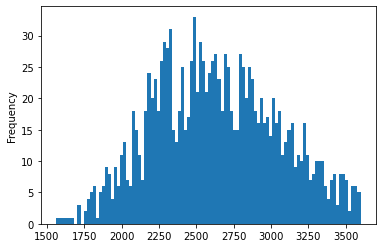

In [78]:
#Analisis de datos Mujeres
df_F = df[df['division'].str.contains("F")]

#Analisis de datos natación Mujeres

F_dt = df_F.describe()

df_F['swim'].astype('timedelta64[s]').plot.hist(bins=100)

lower_limit = df_F.swim.mean() - 3*df_F.swim.std()
upper_limit = df_F.swim.mean() + 3*df_F.swim.std()

df_F[df_F.swim > upper_limit]#no hay valores por encima del limit superior
df_F[df_F.swim < lower_limit]# no hay valores por debajo del limite inferior

df_F.swim.describe()

count                         1415
mean     0 days 03:08:07.008480565
std      0 days 00:19:38.204957609
min                0 days 02:22:45
25%         0 days 02:54:14.500000
50%                0 days 03:05:28
75%                0 days 03:19:43
max                0 days 04:30:38
Name: bike, dtype: object

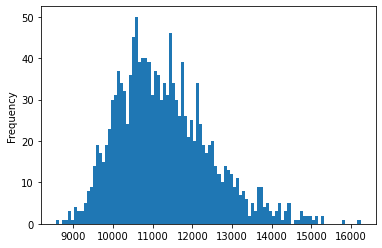

In [18]:
#Analisis de datos ciclismo Mujeres

df_F['bike'].astype('timedelta64[s]').plot.hist(bins=100)

lower_limit = df_F.bike.mean() - 3*df_F.bike.std()
upper_limit = df_F.bike.mean() + 3*df_F.bike.std()

df_F[df_F.bike > upper_limit]#no se descartan valores por encima porque son posibles
df_F[df_F.bike < lower_limit]# no hay valores por debajo del limite inferior

df_F.bike.describe()

count                         1415
mean     0 days 02:10:31.570318021
std      0 days 00:21:19.472157550
min                0 days 01:26:24
25%         0 days 01:54:48.500000
50%                0 days 02:07:44
75%                0 days 02:23:44
max                0 days 03:39:51
Name: run, dtype: object

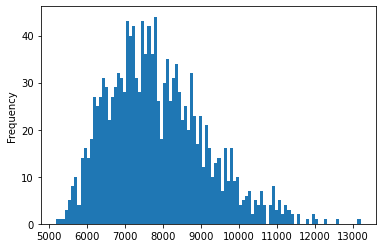

In [77]:
#Analisis de datos carrera a pie Mujeres
df_F['run'].astype('timedelta64[s]').plot.hist(bins=100)

lower_limit = df_F.run.mean() - 3*df_F.run.std()
upper_limit = df_F.run.mean() + 3*df_F.run.std()

df_F[df_F.run > upper_limit]#no se descartan valores por encima porque son posibles
df_F[df_F.run < lower_limit]# no hay valores por debajo del limite inferior

df_F.run.describe()

,swim,bike,run,total
count,1358,1415,1415,1422
mean,0 days 00:43:55.025036818,0 days 03:08:07.008480565,0 days 02:10:31.570318021,0 days 06:11:36.623769338
std,0 days 00:06:59.828600627,0 days 00:19:38.204957609,0 days 00:21:19.472157550,0 days 00:43:57.188343159
min,0 days 00:26:03,0 days 02:22:45,0 days 01:26:24,0 days 04:34:21
25%,0 days 00:38:29,0 days 02:54:14.500000,0 days 01:54:48.500000,0 days 05:39:13
50%,0 days 00:43:31,0 days 03:05:28,0 days 02:07:44,0 days 06:07:53
75%,0 days 00:48:57.250000,0 days 03:19:43,0 days 02:23:44,0 days 06:40:10.250000
max,0 days 00:59:58,0 days 04:30:38,0 days 03:39:51,0 days 08:58:08


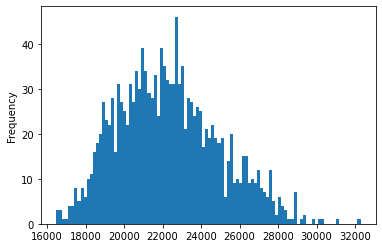

In [32]:
#Analisis de datos totales Mujeres
df_F['total'].astype('timedelta64[s]').plot.hist(bins=100)

lower_limit = df_F.total.mean() - 3*df_F.run.std()
upper_limit = df_F.total.mean() + 3*df_F.run.std()

df_F[df_F.total > upper_limit]#no se descartan valores por encima porque son posibles
df_F[df_F.total < lower_limit]# no se descartan por debajo del limite inferior, son posibles

df_f_t = df_F.filter(items=['swim', 'bike', "run", "total"])
df_f_t.describe()

#########################
#Fin de Analisis Mujeres
#########################

/var/folders/bk/x55tr7795d12bw0rwtpbzcnr0000gn/T/ipykernel_48239/653481037.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M.swim = df_M.swim.where(lambda x: x > limit_swim, np.nan)


count                         5946
mean     0 days 00:40:12.697443659
std      0 days 00:06:57.295976286
min                0 days 00:21:51
25%                0 days 00:35:00
50%                0 days 00:39:32
75%                0 days 00:44:41
max                0 days 00:59:56
Name: swim, dtype: object

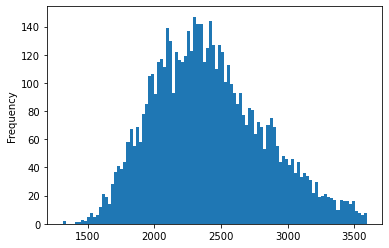

In [76]:
#Analisis de datos de Hombres
df_M = df[df['division'].str.contains("M")]

#Analisis de datos natación hombres

M_dt = df_M.describe()

#df_M['swim'].astype('timedelta64[s]').plot.hist(bins=100)

lower_limit = df_M.swim.mean() - 3*df_M.swim.std()
upper_limit = df_M.swim.mean() + 3*df_M.swim.std()

df_M[df_M.swim > upper_limit]#no hay valores por encima del limit superior
df_M[df_M.swim < lower_limit]

limit_swim = pd.to_timedelta("0 days 00:21:00")#record de natacion ironman70.3
df_M.swim = df_M.swim.where(lambda x: x > limit_swim, np.nan) 
#esto reemplaza los valores menores a limit_swim por nan, pero a pandas no le gusta 
#Yo no termino de entender que está haciendo tampoco

df_M['swim'].astype('timedelta64[s]').plot.hist(bins=100)

df_M.swim.describe()

/var/folders/bk/x55tr7795d12bw0rwtpbzcnr0000gn/T/ipykernel_48239/4208762420.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M.bike = df_M.bike.where(lambda x: x > limit_bike, np.nan)


count                         6074
mean     0 days 02:51:18.283997365
std      0 days 00:19:27.262477313
min                0 days 02:10:27
25%                0 days 02:37:28
50%         0 days 02:48:30.500000
75%         0 days 03:02:05.750000
max                0 days 04:25:26
Name: bike, dtype: object

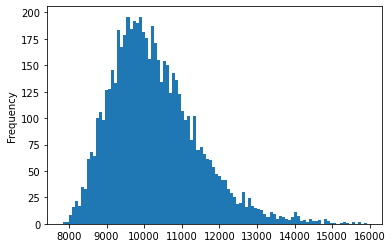

In [89]:
#df_M['bike'].astype('timedelta64[s]').plot.hist(bins=100)

lower_limit = df_M.bike.mean() - 3*df_M.bike.std()
upper_limit = df_M.bike.mean() + 3*df_M.bike.std()

df_M[df_M.bike > upper_limit]#no se descartan valores por encima porque son posibles
df_M[df_M.bike < lower_limit]#se descarta valor por debajo

limit_bike = pd.to_timedelta("0 days 01:56:00")#record de ciclismo en ironman70.3
df_M.bike = df_M.bike.where(lambda x: x > limit_bike, np.nan)

df_M['bike'].astype('timedelta64[s]').plot.hist(bins=100)
df_M.bike.describe()

/var/folders/bk/x55tr7795d12bw0rwtpbzcnr0000gn/T/ipykernel_48239/3586660019.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M.run = df_M.run.where(lambda x: x < limit_run, np.nan)#se descarta dato duración mayor a un día


count                         6076
mean     0 days 02:02:07.834430546
std      0 days 00:23:16.529855666
min                0 days 01:06:24
25%         0 days 01:45:06.750000
50%                0 days 01:58:31
75%         0 days 02:15:12.250000
max                0 days 03:50:10
Name: run, dtype: object

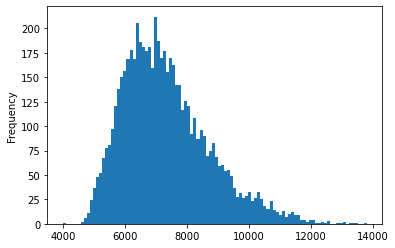

In [92]:
df_M['run'].astype('timedelta64[s]').plot.hist(bins=100)

lower_limit = df_M.run.mean() - 3*df_M.run.std()
upper_limit = df_M.run.mean() + 3*df_M.run.std()

df_M[df_M.run > upper_limit]#no se descartan valores por encima porque son posibles
limit_run = pd.to_timedelta("1 days 00:00:00")
df_M.run = df_M.run.where(lambda x: x < limit_run, np.nan)#se descarta dato duración mayor a un día
df_M[df_M.run < lower_limit]# no hay valores por debajo del limite inferior

df_M.run.describe()

,swim,bike,run,total
count,5946,6074,6076,6110
mean,0 days 00:40:12.697443659,0 days 02:51:18.283997365,0 days 02:02:07.834430546,0 days 05:42:02.385433715
std,0 days 00:06:57.295976286,0 days 00:19:27.262477313,0 days 00:23:16.529855666,0 days 00:45:50.344396336
min,0 days 00:21:51,0 days 02:10:27,0 days 01:06:24,0 days 04:01:18
25%,0 days 00:35:00,0 days 02:37:28,0 days 01:45:06.750000,0 days 05:08:43
50%,0 days 00:39:32,0 days 02:48:30.500000,0 days 01:58:31,0 days 05:37:18.500000
75%,0 days 00:44:41,0 days 03:02:05.750000,0 days 02:15:12.250000,0 days 06:09:43.750000
max,0 days 00:59:56,0 days 04:25:26,0 days 03:50:10,0 days 08:51:08


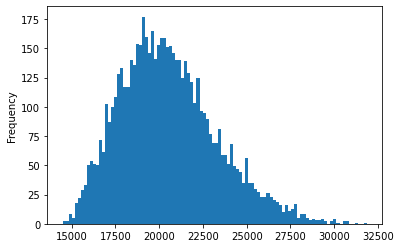

In [95]:
df_M['total'].astype('timedelta64[s]').plot.hist(bins=100)

lower_limit = df_M.total.mean() - 3*df_M.run.std()
upper_limit = df_M.total.mean() + 3*df_M.run.std()

df_M[df_M.total > upper_limit]#no se descartan valores por encima porque son posibles
df_M[df_M.total < lower_limit]# no se descartan por debajo del limite inferior, son posibles

df_m_t = df_M.filter(items=['swim', 'bike', "run", "total"])
df_m_t.describe()
